In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

hotels_df = pd.read_csv("https://raw.githubusercontent.com/MuhammadYusufAndrika/tripskuy-capstone/refs/heads/main/merged_hotels_data.csv")
hotels_df.head()

,id_city,city,id_hotel,name_hotel,region,star_rating,num_reviews,hotel_features,price,url_image,rating,category,coordinates
0,1,Bandung,15,Amaroossa Bandung,"Jalan Riau, Bandung",4.0,5511.0,"Sewa mobil, Layanan pijat, Pusat kebugaran, Ak...",2204301,https://storage.googleapis.com/picture-bucket1...,1.145202,luxury,"-6.908619, 107.618396"
1,1,Bandung,71,Grand Serela Setiabudhi by KAGUM Hotels,"Setiabudi, Bandung",4.0,6164.0,"Tennis meja, Jacuzzi, Area main anak, Sewa mob...",1096333,https://storage.googleapis.com/picture-bucket1...,1.280898,luxury,"-6.8810402, 107.60120919999996"
2,1,Bandung,155,Nine Inn by Edotel Dbest,"Batununggal, Bandung",2.0,35.0,Bayar saat Check-in,1017500,https://storage.googleapis.com/picture-bucket1...,0.003637,midrange,"-6.93946554350589, 107.656755266489"
3,1,Bandung,25,Atlantic City Hotel,"Pasirkaliki, Bandung",3.0,9630.0,"Layanan pijat, Aksesibel bagi penyandang disab...",673333,https://storage.googleapis.com/picture-bucket1...,1.500857,budget,"-6.9069168411350725, 107.59769817790982"
4,1,Bandung,97,Horison Ultima Bandung,"Lengkong, Bandung",4.0,17509.0,"Area main anak, Klub anak, Pusat kebugaran, La...",1150667,https://storage.googleapis.com/picture-bucket1...,3.638423,midrange,"-6.935608, 107.625306"


In [ ]:
# Fitur dan target
X = hotels_df[['price', 'rating', 'num_reviews', 'star_rating', 'city']]
y = hotels_df['category']


In [ ]:
# Encode kolom 'city' menggunakan OneHotEncoder
city_encoder = OneHotEncoder(sparse_output=False)  # Perbaikan
city_encoded = city_encoder.fit_transform(X[['city']])
city_encoded_df = pd.DataFrame(city_encoded, columns=city_encoder.get_feature_names_out(['city']))


In [ ]:
# Gabungkan hasil OneHotEncoder dengan fitur numerik lainnya
X = pd.concat([X[['price', 'rating', 'num_reviews', 'star_rating']], city_encoded_df], axis=1)

In [ ]:
# Encode kolom kategori (target) menjadi numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Konversi ke TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)


In [ ]:
model = tf.keras.Sequential([
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train_tf.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(3, activation='softmax')  # Output untuk 3 kategori (luxury, midrange, budget)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Kompilasi model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Melatih model
history = model.fit(
    X_train_tf, y_train_tf,
    validation_data=(X_test_tf, y_test_tf),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.3481 - loss: 4.2205 - val_accuracy: 0.3043 - val_loss: 4.1255
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.4299 - loss: 4.0735 - val_accuracy: 0.3261 - val_loss: 3.9943
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5078 - loss: 3.9183 - val_accuracy: 0.3261 - val_loss: 3.8672
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4969 - loss: 3.8140 - val_accuracy: 0.3261 - val_loss: 3.7409
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5756 - loss: 3.6828 - val_accuracy: 0.3478 - val_loss: 3.6169
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4952 - loss: 3.5418 - val_accuracy: 0.3696 - val_loss: 3.4935
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5568 - loss: 3.4186 - val_accuracy: 0.3913 - val_loss: 3.3711
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5445 - loss: 3.3032 - val_accuracy: 0.4783 - val_loss:

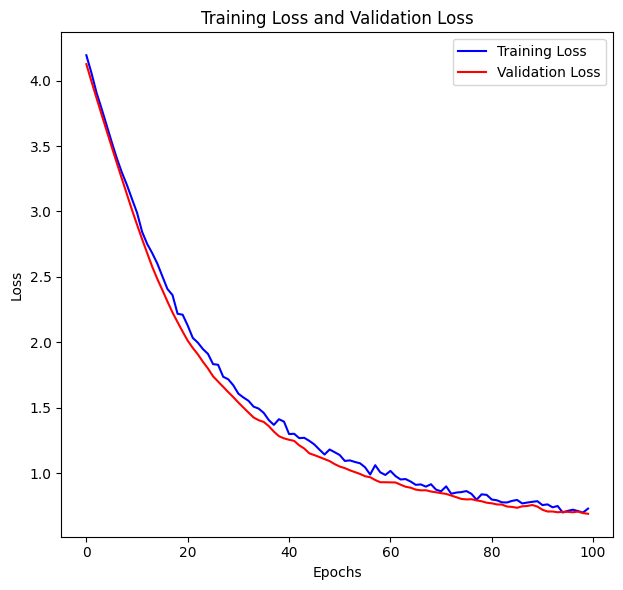

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


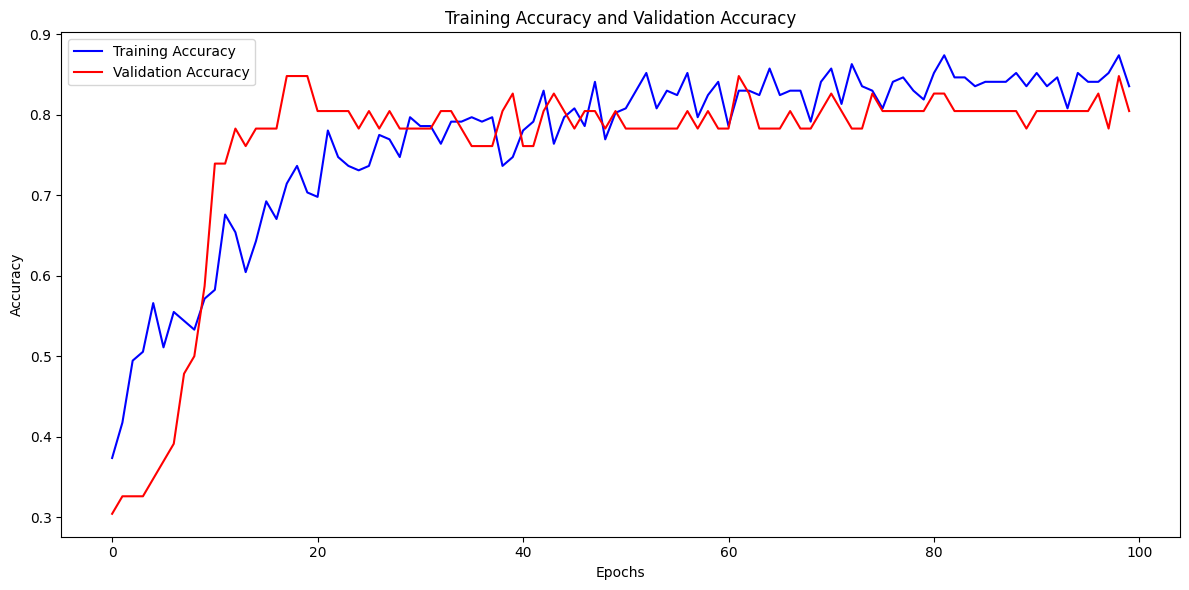

In [ ]:
# Plot training accuracy and validation accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')  # Akurasi untuk training
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')  # Akurasi untuk validation
plt.title('Training Accuracy and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:

# Fungsi rekomendasi hotel
def recommend_hotel(user_location, user_budget):
    # Filter berdasarkan lokasi
    filtered_hotels = hotels_df[hotels_df['city'] == user_location] if user_location in hotels_df['city'].values else None

    if filtered_hotels is not None:
        # Filter berdasarkan budget pengguna
        affordable_hotels = filtered_hotels[filtered_hotels['price'] <= user_budget]

        if not affordable_hotels.empty:
            # Reset index agar sinkron
            affordable_hotels = affordable_hotels.reset_index(drop=True)

            # Encode dan standarisasi fitur untuk prediksi
            affordable_features = affordable_hotels[['price', 'rating', 'num_reviews', 'star_rating']]
            city_encoded = city_encoder.transform(affordable_hotels[['city']])
            city_encoded_df = pd.DataFrame(city_encoded, columns=city_encoder.get_feature_names_out(['city']))

            # Gabungkan fitur numerik dengan hasil encoding
            affordable_features = pd.concat([affordable_features, city_encoded_df], axis=1)

            # Standarisasi fitur
            affordable_features_scaled = scaler.transform(affordable_features)

            # Prediksi kategori
            affordable_predictions = model.predict(affordable_features_scaled)
            predicted_categories = label_encoder.inverse_transform(np.argmax(affordable_predictions, axis=1))

            # Tambahkan kolom prediksi ke DataFrame
            affordable_hotels['category_hotel'] = predicted_categories

            # Urutkan berdasarkan rating tertinggi dan tampilkan
            sorted_hotels = affordable_hotels.sort_values(by='price', ascending=False)
            print("Rekomendasi hotel:")
            print(sorted_hotels[['name_hotel', 'price', 'category_hotel', 'star_rating','coordinates','url_image']])
        else:
            print("Tidak ada hotel yang sesuai dengan budget Anda.")
    else:
        print("Lokasi tidak ditemukan dalam dataset.")
# Fungsi main untuk menerima input pengguna
def main():
    user_location = input("Masukkan lokasi hotel: ")
    user_budget = float(input("Masukkan budget Anda (dalam rupiah): "))
    recommend_hotel(user_location, user_budget)

# Jalankan program
if __name__ == "__main__":
    main()


Masukkan lokasi hotel: Bandung
Masukkan budget Anda (dalam rupiah): 2000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Rekomendasi hotel:
                                           name_hotel    price category_hotel  \
29                               De Paviljoen Bandung  2000000         luxury   
8                                Grand Hotel Preanger  1916667         luxury   
6                                  The Luxton Bandung  1759500         luxury   
16                               THE 1O1 Bandung Dago  1755000       midrange   
15                      Grand Tjokro Premiere Bandung  1751482       midrange   
26                                Sensa Hotel Bandung  1654667       midrange   
10                        Holiday Inn BANDUNG PASTEUR  1559199         luxury   
23                                      Kedaton Hotel  1481481       midrange   
13                                       Moxy Bandung  1411667       midrange   
14                            eL Hotel Royale Bandung  13

In [ ]:
# Simpan model ke dalam format HDF5
model.save('hotel_rating_predictor.h5')

# Simpan model dalam format Keras terbaru
model.save('hotel_rating_predictor.keras')

